In [ ]:
##Extracción de datos desde el archivo csv
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
##crear el dataframe del archivo csv
import os

# Set the search parameters
filename = 'datosari.csv'
search_path = '/content/drive/MyDrive/Colab Notebooks/Galapagos'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

print("Path: ", file_path)

Path:  /content/drive/MyDrive/Colab Notebooks/Galapagos/datosari.csv


In [ ]:
import pandas as pd

# Load the XLSX file into a DataFrame
df = pd.read_csv(file_path, low_memory=False)

In [ ]:
df

fecha          X         Y  ETIQUETA_MES    year  month
0       5/28/2021 -90.317261 -0.692529           5.0  2021.0    5.0
1       11/3/2022 -90.317264 -0.692521          23.0  2022.0   11.0
2        8/2/2021 -90.317277 -0.692511           8.0  2021.0    8.0
3       7/10/2022 -90.317282 -0.692503          19.0  2022.0    7.0
4       6/25/2021 -90.317276 -0.692498           6.0  2021.0    6.0
...           ...        ...       ...           ...     ...    ...
56086  12/16/2023 -90.277298 -0.689994          26.0  2023.0   12.0
56087  12/17/2023 -90.276981 -0.671113          26.0  2023.0   12.0
56088   12/9/2023 -90.278475 -0.671083          26.0  2023.0   12.0
56089  12/10/2023 -90.279445 -0.671802          26.0  2023.0   12.0
56090         NaN        NaN       NaN           NaN     NaN    NaN

[56091 rows x 6 columns]

In [ ]:
df=df.dropna()

In [ ]:
##para ver etiqueta mes
df['ETIQUETA_MES'].value_counts()

ETIQUETA_MES
6.0     2453
5.0     2436
17.0    2432
9.0     2429
10.0    2416
3.0     2408
13.0    2402
15.0    2400
1.0     2400
20.0    2397
19.0    2366
23.0    2348
7.0     2343
16.0    2320
4.0     2318
22.0    2292
21.0    2285
8.0     2278
11.0    2264
12.0    2264
18.0    2245
24.0    2244
2.0     2182
14.0    2089
25.0      51
26.0      28
Name: count, dtype: int64

In [ ]:
##para ver Month
df['month'].value_counts()

month
5.0     4868
3.0     4808
1.0     4801
9.0     4763
10.0    4726
7.0     4709
6.0     4698
8.0     4678
4.0     4638
11.0    4612
12.0    4518
2.0     4271
Name: count, dtype: int64

In [ ]:
df_triangulaciones = df[df['ETIQUETA_MES'] == 25]

In [ ]:
df_triangulaciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 56011 to 56061
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         51 non-null     object 
 1   X             51 non-null     float64
 2   Y             51 non-null     float64
 3   ETIQUETA_MES  51 non-null     float64
 4   year          51 non-null     float64
 5   month         51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [ ]:
##para hacer un EDA dinámico, no funciona para big data
!pip install pivottablejs

In [ ]:
import pandas as pd
from pivottablejs import pivot_ui
from IPython.display import HTML
pivot_ui(df,outfile_path='pivottablejs.html')
HTML('pivottablejs.html')

## Clusterización k-means


In [ ]:
##importo librerías
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,QuantileTransformer
import matplotlib.pyplot as plt

In [ ]:
##visualizamos el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56090 entries, 0 to 56089
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         56090 non-null  object 
 1   X             56090 non-null  float64
 2   Y             56090 non-null  float64
 3   ETIQUETA_MES  56090 non-null  float64
 4   year          56090 non-null  float64
 5   month         56090 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.0+ MB


In [ ]:
##para ver los dos primeros datos
df.head(2)

fecha          X         Y  ETIQUETA_MES    year  month
0  5/28/2021 -90.317261 -0.692529           5.0  2021.0    5.0
1  11/3/2022 -90.317264 -0.692521          23.0  2022.0   11.0

Text(0, 0.5, 'Y')

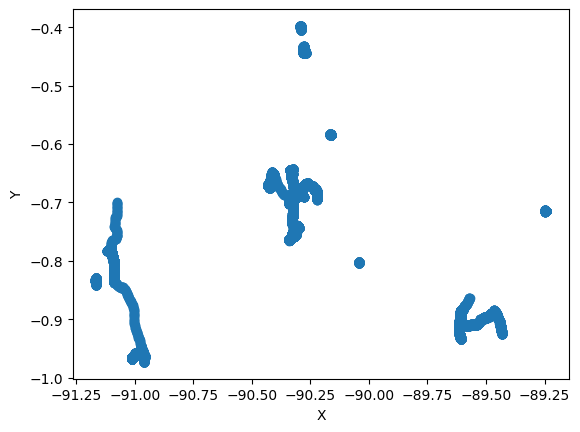

In [ ]:
## scatter plot-es una análisis explotario de datos.
plt.scatter(df['X'],df['Y'])
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
##SE TRATÓ DE SACAR EL MEJOR K
##la función para obtener el K-value. Si se necesita hacer más cosas de clustering se va sklearn.cluster import Kmeans. Caulcular la suma del error cuadrático
sse = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['X','Y']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of Squared Error (SSE)')

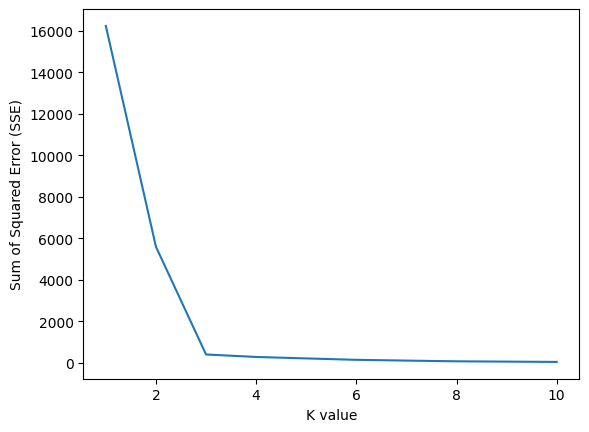

In [ ]:
##visualizamos el Elbow plot (clasifica de mejor manera los datos)
plt.plot(k_range,sse)
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error (SSE)')
##SSE: saca la diferencia entre

In [ ]:
## Se escogió el valor 3 para K, porque es un punto de rompimiento brusco (codo) y porque el error de la suma de los cuadrados decrece significativamente (SSE).
k = 3
clustering = KMeans(n_clusters=k)
clusters = clustering.fit_predict(df[['X','Y']])
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
##se va a añadir el cluster al dataset
df['cluster'] = clusters
df.info()
df.head()

<ipython-input-67-e0d34132830f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


<class 'pandas.core.frame.DataFrame'>
Index: 56090 entries, 0 to 56089
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         56090 non-null  object 
 1   X             56090 non-null  float64
 2   Y             56090 non-null  float64
 3   ETIQUETA_MES  56090 non-null  float64
 4   year          56090 non-null  float64
 5   month         56090 non-null  float64
 6   cluster       56090 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 5.2+ MB


fecha          X         Y  ETIQUETA_MES    year  month  cluster
0  5/28/2021 -90.317261 -0.692529           5.0  2021.0    5.0        1
1  11/3/2022 -90.317264 -0.692521          23.0  2022.0   11.0        1
2   8/2/2021 -90.317277 -0.692511           8.0  2021.0    8.0        1
3  7/10/2022 -90.317282 -0.692503          19.0  2022.0    7.0        1
4  6/25/2021 -90.317276 -0.692498           6.0  2021.0    6.0        1

In [ ]:
##EL K ESCOGIDO, VIENDO LAS CARACTERISITICAS DE X Y Y, VE LAS DIFERENCIAS QUE EXISTE EN CADA UNO Y VA CLASIFICANDO LAS CARACTRISICAS, EN ESTE CASO LA DISTANCIA DE LO PUNTOS (UNSUPERVISED LEARNING)
##para ver los clusters
df['cluster'].value_counts()

cluster
1    27311
2    15009
0    13770
Name: count, dtype: int64

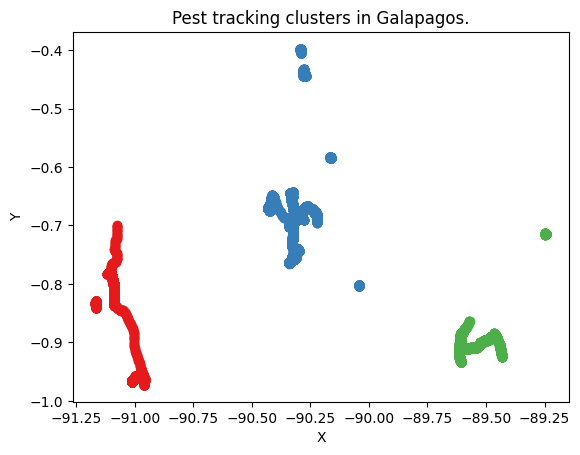

In [ ]:
##Grafico del cluster
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
#df3 = df[df.cluster==3]
plt.scatter(df0['X'],df0['Y'],color='#e41a1c',label='cluster 0')
plt.scatter(df1['X'],df1['Y'],color='#377eb8',label='cluster 1')
plt.scatter(df2['X'],df2['Y'],color='#4daf4a',label='cluster 2')
#plt.scatter(df3['X'],df3['Y($)'],color='#5DC1B9',label='cluster 3')
plt.title('Pest tracking clusters in Galapagos.')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('clusters_scatter_plot.pdf')

In [ ]:
plt.savefig('scatter_plot.pdf')

<Figure size 640x480 with 0 Axes>

In [ ]:
#df1=df0

In [ ]:
#df1=df2

In [ ]:
df1

fecha          X         Y  ETIQUETA_MES    year  month  cluster
0       5/28/2021 -90.317261 -0.692529           5.0  2021.0    5.0        1
1       11/3/2022 -90.317264 -0.692521          23.0  2022.0   11.0        1
2        8/2/2021 -90.317277 -0.692511           8.0  2021.0    8.0        1
3       7/10/2022 -90.317282 -0.692503          19.0  2022.0    7.0        1
4       6/25/2021 -90.317276 -0.692498           6.0  2021.0    6.0        1
...           ...        ...       ...           ...     ...    ...      ...
56085  12/15/2023 -90.276981 -0.671095          26.0  2023.0   12.0        1
56086  12/16/2023 -90.277298 -0.689994          26.0  2023.0   12.0        1
56087  12/17/2023 -90.276981 -0.671113          26.0  2023.0   12.0        1
56088   12/9/2023 -90.278475 -0.671083          26.0  2023.0   12.0        1
56089  12/10/2023 -90.279445 -0.671802          26.0  2023.0   12.0        1

[27311 rows x 7 columns]

## ESTANDARIZACIÓN DE ESCALAS
# SE MODIFICA X para que tenga la misma escala de Y


In [ ]:
#promedio = df1['X'].mean()
promedio = abs(df1['X'].median())
print("El promedio de la columna 'X' es:", promedio)

El promedio de la columna 'X' es: 90.3197


In [ ]:
max_X = df['X'].max()
promedio = max_X
max_Y = df['Y'].max()
promedio_Y = max_Y

In [ ]:
print(max_X)

-89.242338


In [ ]:
print(promedio_Y)

-0.397909


In [ ]:
df1

fecha          X         Y  ETIQUETA_MES    year  month  cluster
0       5/28/2021 -90.317261 -0.692529           5.0  2021.0    5.0        1
1       11/3/2022 -90.317264 -0.692521          23.0  2022.0   11.0        1
2        8/2/2021 -90.317277 -0.692511           8.0  2021.0    8.0        1
3       7/10/2022 -90.317282 -0.692503          19.0  2022.0    7.0        1
4       6/25/2021 -90.317276 -0.692498           6.0  2021.0    6.0        1
...           ...        ...       ...           ...     ...    ...      ...
56085  12/15/2023 -90.276981 -0.671095          26.0  2023.0   12.0        1
56086  12/16/2023 -90.277298 -0.689994          26.0  2023.0   12.0        1
56087  12/17/2023 -90.276981 -0.671113          26.0  2023.0   12.0        1
56088   12/9/2023 -90.278475 -0.671083          26.0  2023.0   12.0        1
56089  12/10/2023 -90.279445 -0.671802          26.0  2023.0   12.0        1

[27311 rows x 7 columns]

In [ ]:
#disminuyo el |promedio| -2
df1['X'] = df1['X'] / promedio# * (-1)
# Muestra el DataFrame resultante
df1['Y']=df1['Y'] / promedio_Y# * (-1)
print(df1)



            fecha         X         Y  ETIQUETA_MES    year  month  cluster
0       5/28/2021  1.012045  1.740421           5.0  2021.0    5.0        1
1       11/3/2022  1.012045  1.740400          23.0  2022.0   11.0        1
2        8/2/2021  1.012045  1.740375           8.0  2021.0    8.0        1
3       7/10/2022  1.012045  1.740356          19.0  2022.0    7.0        1
4       6/25/2021  1.012045  1.740342           6.0  2021.0    6.0        1
...           ...       ...       ...           ...     ...    ...      ...
56085  12/15/2023  1.011594  1.686553          26.0  2023.0   12.0        1
56086  12/16/2023  1.011597  1.734050          26.0  2023.0   12.0        1
56087  12/17/2023  1.011594  1.686598          26.0  2023.0   12.0        1
56088   12/9/2023  1.011610  1.686523          26.0  2023.0   12.0        1
56089  12/10/2023  1.011621  1.688332          26.0  2023.0   12.0        1

[27311 rows x 7 columns]


<ipython-input-79-a1fb2289378a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['X'] = df1['X'] / promedio# * (-1)
<ipython-input-79-a1fb2289378a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Y']=df1['Y'] / promedio_Y# * (-1)


## DEEP LEARNING-TRAINING Y WITH TRANSFORMERS.

In [ ]:
df1['ETIQUETA_MES'].value_counts()

ETIQUETA_MES
6.0     1205
17.0    1199
9.0     1194
1.0     1182
19.0    1180
13.0    1179
5.0     1167
3.0     1159
7.0     1158
4.0     1155
15.0    1150
10.0    1148
20.0    1143
12.0    1142
24.0    1138
16.0    1137
23.0    1132
22.0    1104
21.0    1086
8.0     1080
18.0    1074
11.0    1070
2.0     1063
14.0     987
25.0      51
26.0      28
Name: count, dtype: int64

In [ ]:
## se está haciendo el split de la data: 1-15 training; 16-24_testing. Además, se está tomando el cluter 1
df1['Y'] = df1['Y'].astype(float)
df_train = df1[df1['ETIQUETA_MES']<26]#16
#df_train = df[df['ETIQUETA_MES_x']<16]#16
df_test = df1[df1['ETIQUETA_MES']>=26]#16

spots_train = df_train['Y'].tolist()
spots_test = df_test['Y'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))

Training set has 27283 observations.
Test set has 28 observations.


<ipython-input-81-3a47b804ebb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Y'] = df1['Y'].astype(float)


In [ ]:
df_train

fecha         X         Y  ETIQUETA_MES    year  month  cluster
0      5/28/2021  1.012045  1.740421           5.0  2021.0    5.0        1
1      11/3/2022  1.012045  1.740400          23.0  2022.0   11.0        1
2       8/2/2021  1.012045  1.740375           8.0  2021.0    8.0        1
3      7/10/2022  1.012045  1.740356          19.0  2022.0    7.0        1
4      6/25/2021  1.012045  1.740342           6.0  2021.0    6.0        1
...          ...       ...       ...           ...     ...    ...      ...
56057  9/22/2023  1.011597  1.734050          25.0  2023.0    9.0        1
56058  9/22/2023  1.011594  1.686553          25.0  2023.0    9.0        1
56059  9/24/2023  1.011594  1.686553          25.0  2023.0    9.0        1
56060  9/24/2023  1.011597  1.734050          25.0  2023.0    9.0        1
56061  9/21/2023  1.011597  1.688627          25.0  2023.0    9.0        1

[27283 rows x 7 columns]

In [ ]:
df_test

fecha         X         Y  ETIQUETA_MES    year  month  cluster
56062   10/2/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56063  10/10/2023  1.011597  1.734050          26.0  2023.0   10.0        1
56064  10/10/2023  1.011597  1.734050          26.0  2023.0   10.0        1
56065  10/10/2023  1.012055  1.869389          26.0  2023.0   10.0        1
56066  10/10/2023  1.012055  1.869389          26.0  2023.0   10.0        1
56067  10/11/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56068  10/11/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56069  10/16/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56070  10/16/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56071  10/17/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56072  10/18/2023  1.011611  1.690002          26.0  2023.0   10.0        1
56073  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56074  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56075  10/24/2023  1.011594  1.686553          26.0  2023.0   10.0        1
56076  10/24/2023  1.011594  1.686553          26.0  2023.0   10.0        1
56077  10/24/2023  1.011593  1.684910          26.0  2023.0   10.0        1
56078  10/24/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56079  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56080  12/10/2023  1.011617  1.692265          26.0  2023.0   12.0        1
56081  12/11/2023  1.011610  1.686523          26.0  2023.0   12.0        1
56082  12/12/2023  1.011597  1.688627          26.0  2023.0   12.0        1
56083  12/13/2023  1.011621  1.688332          26.0  2023.0   12.0        1
56084  12/14/2023  1.011594  1.686553          26.0  2023.0   12.0        1
56085  12/15/2023  1.011594  1.686553          26.0  2023.0   12.0        1
56086  12/16/2023  1.011597  1.734050          26.0  2023.0   12.0        1
56087  12/17/2023  1.011594  1.686598          26.0  2023.0   12.0        1
56088   12/9/2023  1.011610  1.686523          26.0  2023.0   12.0        1
56089  12/10/2023  1.011621  1.688332          26.0  2023.0   12.0        1

In [ ]:
## Prepare dataset 200 for graph in predict. se está tomando los primeros 200 datasets solamente del mes 16
primeros_200 = df_test.iloc[:200]
primeros_200

fecha         X         Y  ETIQUETA_MES    year  month  cluster
56062   10/2/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56063  10/10/2023  1.011597  1.734050          26.0  2023.0   10.0        1
56064  10/10/2023  1.011597  1.734050          26.0  2023.0   10.0        1
56065  10/10/2023  1.012055  1.869389          26.0  2023.0   10.0        1
56066  10/10/2023  1.012055  1.869389          26.0  2023.0   10.0        1
56067  10/11/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56068  10/11/2023  1.011597  1.688627          26.0  2023.0   10.0        1
56069  10/16/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56070  10/16/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56071  10/17/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56072  10/18/2023  1.011611  1.690002          26.0  2023.0   10.0        1
56073  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56074  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56075  10/24/2023  1.011594  1.686553          26.0  2023.0   10.0        1
56076  10/24/2023  1.011594  1.686553          26.0  2023.0   10.0        1
56077  10/24/2023  1.011593  1.684910          26.0  2023.0   10.0        1
56078  10/24/2023  1.011621  1.688332          26.0  2023.0   10.0        1
56079  10/24/2023  1.011610  1.686523          26.0  2023.0   10.0        1
56080  12/10/2023  1.011617  1.692265          26.0  2023.0   12.0        1
56081  12/11/2023  1.011610  1.686523          26.0  2023.0   12.0        1
56082  12/12/2023  1.011597  1.688627          26.0  2023.0   12.0        1
56083  12/13/2023  1.011621  1.688332          26.0  2023.0   12.0        1
56084  12/14/2023  1.011594  1.686553          26.0  2023.0   12.0        1
56085  12/15/2023  1.011594  1.686553          26.0  2023.0   12.0        1
56086  12/16/2023  1.011597  1.734050          26.0  2023.0   12.0        1
56087  12/17/2023  1.011594  1.686598          26.0  2023.0   12.0        1
56088   12/9/2023  1.011610  1.686523          26.0  2023.0   12.0        1
56089  12/10/2023  1.011621  1.688332          26.0  2023.0   12.0        1

In [ ]:
## se está cambiando el formato de número para el modelo de deep learning
import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (27273, 10, 1)
Shape of test set: (18, 10, 1)


In [ ]:
##instalación de librarías para hacer uso de la GPU (TARJETA GRAFICA)
!pip install tensorflow

In [ ]:
##MODELO DE DEEP LEARNING CON VARIAS CAPAS CONVOLUCIONALES
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
#CAPA DE ATENCIÓN DEL MODELO TRANSFORMER
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

#ENTRENAMIENTO DEL MODELO TRANSFORMER

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/200
341/341 [==============================] - 43s 28ms/step - loss: 0.4038 - val_loss: 0.0069
Epoch 2/200
341/341 [==============================] - 8s 24ms/step - loss: 0.1255 - val_loss: 3.2648e-04
Epoch 3/200
341/341 [==============================] - 8s 23ms/step - loss: 0.0958 - val_loss: 0.0028
Epoch 4/200
341/341 [==============================] - 9s 26ms/step - loss: 0.0782 - val_loss: 4.1262e-04
Epoch 5/200
341/341 [==============================] - 8s 22ms/step - loss: 0.0649 - val_loss: 9.4761e-04
Epoch 6/200
341/341 [==============================] - 9s 26ms/step - loss: 0.0548 - val_loss: 2.8472e-04
Epoch 7/200
341/341 [==============================] - 8s 23ms/step - loss: 0.0456 - val_loss: 4.5739e-04
Epoch 8/200
341/341 [==============================] - 8s 24ms/step - loss: 0.0401 - val_loss: 4.8083e-04
Epoch 9/200
341/341 [==============================] - 11s 32ms/step - loss: 0.0350 - val_loss: 1.5849e-04
Epoch 10/200
341/341 [==============================

0.00023523761774413288

In [ ]:
##RAIZ DE ERROR CUADRÁTICO MEDIO: COMPARA EL VALOR PREDICHO CON EL VALOR REAL ENTRE EL TOTAL NÚMERO DE VALORES OBSERVADOS
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

1/1 [==============================] - 0s 480ms/step
Score (RMSE): 0.015337444714226217


In [ ]:
##GUARDAR EL MODELO DE Y
!pip install joblib

In [ ]:
## SE GUARDA EL MODELO DE Y YA ENTRENADO PARA HACER LAS INFERENCIAS EN EL DEPLOYMENT
import joblib
joblib.dump(model,'modelo_Y_entrenado.pkl')

['modelo_Y_entrenado.pkl']

In [ ]:
##SON LOS VALORES PREDICHOS EN OTRO FORMATO
pred

array([[1.7248231],
       [1.7128751],
       [1.693293 ],
       [1.6780524],
       [1.6834711],
       [1.6903656],
       [1.6896867],
       [1.6893667],
       [1.6894482],
       [1.6892458],
       [1.6898777],
       [1.6896857],
       [1.6905881],
       [1.6909369],
       [1.6903318],
       [1.6935053],
       [1.6980951],
       [1.6919188]], dtype=float32)

In [ ]:
##LOS VALORES DE Y USADOS PARA EL TESTEO
y_test

array([1.69000201, 1.68652261, 1.68652261, 1.68655298, 1.68655298,
       1.6849097 , 1.6883318 , 1.68652261, 1.69226485, 1.68652261,
       1.68862744, 1.6883318 , 1.68655298, 1.68655298, 1.73404998,
       1.68659841, 1.68652261, 1.6883318 ])

In [ ]:
##SE ESTÁ CREANDO UN DATAFRAME PARA DESPUÉS GRAFICAR LOS VALORES REALES
df_realy = pd.DataFrame({'Y_Real': y_test})

In [ ]:
## SE ESTÁ CAMBIANDO EL FORMATO DE LOS VALORES PREDICHOS
pred2 = pred.reshape(-1)

In [ ]:
## SE GUARDA LOS VALORES PREDICHOS
df_predicty = pd.DataFrame({'Y_Predict': pred2})

In [ ]:
## CREACIÓN DE BASE DE DATOS QUE VA A AYUDAR A GRAFICAR LOS PUNTOS DE LA VARIABLE Y
# Combina los DataFrames usando pd.concat
df_combined1 = pd.concat([df_realy, df_predicty], axis=1)

# Muestra el DataFrame combinado
print(df_combined1)

      Y_Real  Y_Predict
0   1.690002   1.724823
1   1.686523   1.712875
2   1.686523   1.693293
3   1.686553   1.678052
4   1.686553   1.683471
5   1.684910   1.690366
6   1.688332   1.689687
7   1.686523   1.689367
8   1.692265   1.689448
9   1.686523   1.689246
10  1.688627   1.689878
11  1.688332   1.689686
12  1.686553   1.690588
13  1.686553   1.690937
14  1.734050   1.690332
15  1.686598   1.693505
16  1.686523   1.698095
17  1.688332   1.691919


## TRAINING X WITH TRANSFORMER

In [ ]:
## se está haciendo el split de la data: 1-15 training; 16-24_testing. Además, se está tomando el cluter 1
df1['X'] = df1['X'].astype(float)
df_train = df1[df1['ETIQUETA_MES']<26]#16
#df_train = df[df['ETIQUETA_MES_x']<16]#16
df_test = df1[df1['ETIQUETA_MES']>=26]#16

spots_train = df_train['X'].tolist()
spots_test = df_test['X'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))

Training set has 27283 observations.
Test set has 28 observations.


<ipython-input-99-438c72b55ade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['X'] = df1['X'].astype(float)


In [ ]:
import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (27273, 10, 1)
Shape of test set: (18, 10, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/200
341/341 [==============================] - 39s 44ms/step - loss: 0.0764 - val_loss: 5.7157e-04
Epoch 2/200
341/341 [==============================] - 9s 25ms/step - loss: 0.0343 - val_loss: 1.4965e-04
Epoch 3/200
341/341 [==============================] - 7s 22ms/step - loss: 0.0262 - val_loss: 1.7866e-05
Epoch 4/200
341/341 [==============================] - 9s 26ms/step - loss: 0.0201 - val_loss: 2.0698e-04
Epoch 5/200
341/341 [==============================] - 7s 22ms/step - loss: 0.0161 - val_loss: 3.7983e-06
Epoch 6/200
341/341 [==============================] - 9s 26ms/step - loss: 0.0131 - val_loss: 5.4215e-05
Epoch 7/200
341/341 [==============================] - 8s 23ms/step - loss: 0.0116 - val_loss: 9.0395e-07
Epoch 8/200
341/341 [==============================] - 8s 24ms/step - loss: 0.0104 - val_loss: 1.3974e-04
Epoch 9/200
341/341 [==============================] - 9s 26ms/step - loss: 0.0097 - val_loss: 3.2971e-04
Epoch 10/200
341/341 [=======================

1.0190327470738225e-09

In [ ]:
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

1/1 [==============================] - 0s 433ms/step
Score (RMSE): 3.192067637566223e-05


In [ ]:
df_realx = pd.DataFrame({'X_Real': y_test})

In [ ]:
pred3 = pred.reshape(-1)

In [ ]:
df_predictx = pd.DataFrame({'X_Predict': pred3})

In [ ]:
# Combina los DataFrames usando pd.concat
df_combined2 = pd.concat([df_realx, df_predictx], axis=1)

# Muestra el DataFrame combinado
print(df_combined2)

      X_Real  X_Predict
0   1.011611   1.011637
1   1.011610   1.011626
2   1.011610   1.011666
3   1.011594   1.011641
4   1.011594   1.011601
5   1.011593   1.011580
6   1.011621   1.011579
7   1.011610   1.011577
8   1.011617   1.011578
9   1.011610   1.011577
10  1.011597   1.011579
11  1.011621   1.011581
12  1.011594   1.011579
13  1.011594   1.011580
14  1.011597   1.011579
15  1.011594   1.011577
16  1.011610   1.011577
17  1.011621   1.011575


In [ ]:
import joblib
joblib.dump(model,'modelo_X_entrenado.pkl')

['modelo_X_entrenado.pkl']

## UNIÓN DE LOS DATASETS PARA GRAFICAR

In [ ]:
## SE COMBINAN LOS DATASETS DE X Y DE Y. DE LOS VALORES REALES Y LOS PREDICHOS
df_graph = pd.merge(df_combined1, df_combined2, left_index=True, right_index=True, how='inner')

In [ ]:
df_graph

Y_Real  Y_Predict    X_Real  X_Predict
0   1.690002   1.724823  1.011611   1.011637
1   1.686523   1.712875  1.011610   1.011626
2   1.686523   1.693293  1.011610   1.011666
3   1.686553   1.678052  1.011594   1.011641
4   1.686553   1.683471  1.011594   1.011601
5   1.684910   1.690366  1.011593   1.011580
6   1.688332   1.689687  1.011621   1.011579
7   1.686523   1.689367  1.011610   1.011577
8   1.692265   1.689448  1.011617   1.011578
9   1.686523   1.689246  1.011610   1.011577
10  1.688627   1.689878  1.011597   1.011579
11  1.688332   1.689686  1.011621   1.011581
12  1.686553   1.690588  1.011594   1.011579
13  1.686553   1.690937  1.011594   1.011580
14  1.734050   1.690332  1.011597   1.011579
15  1.686598   1.693505  1.011594   1.011577
16  1.686523   1.698095  1.011610   1.011577
17  1.688332   1.691919  1.011621   1.011575

## Desestandarización

In [ ]:
df_copia = df_graph.copy()

# Resta 90 a la columna 'X' de la copia del DataFrame
#df_copia['X_Real'] = df_copia['X_Real'] - promedio
#df_copia['X_Predict'] = df_copia['X_Predict'] - promedio
df_copia['X_Real'] = df_copia['X_Real'] * promedio
df_copia['X_Predict'] = df_copia['X_Predict'] * promedio
df_copia['Y_Real'] = df_copia['Y_Real'] * promedio_Y
df_copia['Y_Predict'] = df_copia['Y_Predict'] * promedio_Y
# Muestra el DataFrame resultante
print(df_copia)

      Y_Real  Y_Predict     X_Real  X_Predict
0  -0.672467  -0.686323 -90.278491 -90.280853
1  -0.671083  -0.681568 -90.278475 -90.279839
2  -0.671083  -0.673777 -90.278475 -90.283478
3  -0.671095  -0.667712 -90.276981 -90.281242
4  -0.671095  -0.669868 -90.276981 -90.277603
5  -0.670441  -0.672612 -90.276894 -90.275810
6  -0.671802  -0.672342 -90.279445 -90.275673
7  -0.671083  -0.672214 -90.278475 -90.275543
8  -0.673367  -0.672247 -90.279057 -90.275574
9  -0.671083  -0.672166 -90.278475 -90.275459
10 -0.671920  -0.672418 -90.277309 -90.275688
11 -0.671802  -0.672341 -90.279445 -90.275864
12 -0.671095  -0.672700 -90.276981 -90.275703
13 -0.671095  -0.672839 -90.276981 -90.275742
14 -0.689994  -0.672598 -90.277298 -90.275673
15 -0.671113  -0.673861 -90.276981 -90.275467
16 -0.671083  -0.675687 -90.278475 -90.275520
17 -0.671802  -0.673230 -90.279445 -90.275276


In [ ]:
df_copia.to_csv('df_graph.csv', index=False)

In [ ]:
##se está tomando las primeras 200 del mes 16
df_primeras_200 = df_copia.head(200)

## gráfico

In [ ]:
import pandas as pd
import folium

# Supongamos que tienes un DataFrame llamado df1 con las columnas 'X', 'Y' y 'FECHA'

# Crea el mapa de Folium
ecuador = folium.Map(location=[-0.693014, -90.316685], zoom_start=10)

# Itera a través de las filas del DataFrame df1
for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Predict'] #latitud en el eje y
    lon = row['X_Predict'] #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
    folium.Marker(location=[lat, lon]).add_to(ecuador)

# Muestra el mapa
ecuador

In [ ]:
import pandas as pd
import folium

# Supongamos que tienes un DataFrame llamado df1 con las columnas 'X', 'Y' y 'FECHA'

# Crea el mapa de Folium
ecuador = folium.Map(location=[-0.693014, -90.316685], zoom_start=10)

# Itera a través de las filas del DataFrame df1
for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Real'] #latitud en el eje y
    lon = row['X_Real'] #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
    folium.Marker(location=[lat, lon]).add_to(ecuador)

# Muestra el mapa
ecuador

In [ ]:
df_primeras_200

Y_Real  Y_Predict     X_Real  X_Predict
0  -0.672467  -0.686323 -90.278491 -90.280853
1  -0.671083  -0.681568 -90.278475 -90.279839
2  -0.671083  -0.673777 -90.278475 -90.283478
3  -0.671095  -0.667712 -90.276981 -90.281242
4  -0.671095  -0.669868 -90.276981 -90.277603
5  -0.670441  -0.672612 -90.276894 -90.275810
6  -0.671802  -0.672342 -90.279445 -90.275673
7  -0.671083  -0.672214 -90.278475 -90.275543
8  -0.673367  -0.672247 -90.279057 -90.275574
9  -0.671083  -0.672166 -90.278475 -90.275459
10 -0.671920  -0.672418 -90.277309 -90.275688
11 -0.671802  -0.672341 -90.279445 -90.275864
12 -0.671095  -0.672700 -90.276981 -90.275703
13 -0.671095  -0.672839 -90.276981 -90.275742
14 -0.689994  -0.672598 -90.277298 -90.275673
15 -0.671113  -0.673861 -90.276981 -90.275467
16 -0.671083  -0.675687 -90.278475 -90.275520
17 -0.671802  -0.673230 -90.279445 -90.275276

In [ ]:
## sacar las más similares entre sí
# Definir alpha (rango de error)
alpha = 0.01  # Por ejemplo

# Filtrar las filas donde la diferencia entre las columnas Y_Real y Y_Predict sea menor o igual que alpha,
# y la diferencia entre las columnas X_Real y X_Predict sea menor o igual que alpha
condiciones = (abs(df_primeras_200['Y_Real'] - df_primeras_200['Y_Predict']) <= alpha) & \
              (abs(df_primeras_200['X_Real'] - df_primeras_200['X_Predict']) <= alpha)

# Crear el nuevo DataFrame con las filas que cumplen las condiciones
df_coincidencias = df_primeras_200[condiciones]

# Mostrar el nuevo DataFrame
print(df_coincidencias)

      Y_Real  Y_Predict     X_Real  X_Predict
2  -0.671083  -0.673777 -90.278475 -90.283478
3  -0.671095  -0.667712 -90.276981 -90.281242
4  -0.671095  -0.669868 -90.276981 -90.277603
5  -0.670441  -0.672612 -90.276894 -90.275810
6  -0.671802  -0.672342 -90.279445 -90.275673
7  -0.671083  -0.672214 -90.278475 -90.275543
8  -0.673367  -0.672247 -90.279057 -90.275574
9  -0.671083  -0.672166 -90.278475 -90.275459
10 -0.671920  -0.672418 -90.277309 -90.275688
11 -0.671802  -0.672341 -90.279445 -90.275864
12 -0.671095  -0.672700 -90.276981 -90.275703
13 -0.671095  -0.672839 -90.276981 -90.275742
15 -0.671113  -0.673861 -90.276981 -90.275467
16 -0.671083  -0.675687 -90.278475 -90.275520
17 -0.671802  -0.673230 -90.279445 -90.275276


In [ ]:
df_coincidencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2 to 17
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y_Real     15 non-null     float64
 1   Y_Predict  15 non-null     float32
 2   X_Real     15 non-null     float64
 3   X_Predict  15 non-null     float32
dtypes: float32(2), float64(2)
memory usage: 480.0 bytes


In [ ]:
import pandas as pd
import folium

# Supongamos que tienes un DataFrame llamado df1 con las columnas 'X', 'Y' y 'FECHA'

# Crea el mapa de Folium
ecuador = folium.Map(location=[-0.693014, -90.316685], zoom_start=10)

# Itera a través de las filas del DataFrame df1
for index, row in df_coincidencias.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Predict'] #latitud en el eje y
    lon = row['X_Predict'] #longitude en el eje x

    folium.Marker(location=[lat, lon],icon=folium.Icon(color='red', icon='bug', prefix='fa-solid fa-bug')).add_to(ecuador)

ecuador

In [ ]:
import pandas as pd
import folium

# Supongamos que tienes un DataFrame llamado df1 con las columnas 'X', 'Y' y 'FECHA'

# Crea el mapa de Folium
ecuador = folium.Map(location=[-0.693014, -90.316685], zoom_start=10)

for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Real'] #latitud en el eje y
    lon = row['X_Real'] #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
    folium.Marker(location=[lat, lon],icon=folium.Icon(color='green'),tooltip="Mes 25").add_to(ecuador)

for index, row in df_coincidencias.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Predict'] #latitud en el eje y
    lon = row['X_Predict'] #longitude en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
    folium.Marker(location=[lat, lon],icon=folium.Icon(color='red', icon='bug', prefix='fa-solid fa-bug'),tooltip="Mes 26").add_to(ecuador)
for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
    lat = row['Y_Real'] #latitud en el eje y
    lon = row['X_Real'] #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
    folium.Marker(location=[lat, lon],tooltip="Mes 26 Prediction").add_to(ecuador)

ecuador


# Triangulation

In [ ]:
!pip install geopy

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic

# Crear el DataFrame de ejemplo


# Crear el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Función para calcular la intersección de dos círculos
def circle_intersection(center1, radius1, center2, radius2):
    distance = geodesic(center1, center2).meters
    if distance > radius1 + radius2:
        return None  # Los círculos no se intersectan
    elif distance <= abs(radius1 - radius2):
        return None  # Uno de los círculos está dentro del otro
    else:
        # Calcular las coordenadas de los puntos de intersección
        a = (radius1 ** 2 - radius2 ** 2 + distance ** 2) / (2 * distance)
        h = (radius1 ** 2 - a ** 2) ** 0.5
        x2 = center1[0] + a * (center2[0] - center1[0]) / distance
        y2 = center1[1] + a * (center2[1] - center1[1]) / distance
        x3 = x2 + h * (center2[1] - center1[1]) / distance
        y3 = y2 - h * (center2[0] - center1[0]) / distance
        x4 = x2 - h * (center2[1] - center1[1]) / distance
        y4 = y2 + h * (center2[0] - center1[0]) / distance
        return [(x3, y3), (x4, y4)]

# Crear un DataFrame para almacenar los puntos de intersección
df_intersecciones = pd.DataFrame(columns=['Interseccion_X', 'Interseccion_Y'])

# Iterar sobre las filas del DataFrame
for index, row in df_triangulaciones.iterrows():
    coord = (row['Y'], row['X'])
    radius = 83  # Radio constante de 83, como mencionaste

    # Calcular la intersección con los otros círculos y agregarlas al DataFrame
    for index2, row2 in df_triangulaciones.iterrows():
        if index != index2:
            coord2 = (row2['Y'], row2['X'])
            intersecciones = circle_intersection(coord, radius, coord2, radius)
            if intersecciones:
                df_intersecciones = pd.concat([df_intersecciones, pd.DataFrame(intersecciones, columns=['Interseccion_X', 'Interseccion_Y'])], ignore_index=True)

# Guardar el DataFrame de intersecciones como CSV
df_intersecciones.to_csv('puntos_interseccion.csv', index=False)

# Iterar sobre las filas del DataFrame original para agregar marcadores y círculos al mapa
for index, row in df_triangulaciones.iterrows():
    coord = (row['Y'], row['X'])
    radius = 83  # Radio constante de 83, como mencionaste

    # Agregar marcadores y círculos al mapa
    folium.Marker(location=coord, icon=folium.Icon(color='green'), tooltip="Coordenadas: {}, {}".format(row['X'], row['Y'])).add_to(ecuador)
    folium.Circle(radius=radius, location=coord, fill_color="green", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

# Guardar el mapa como HTML
ecuador.save('mapa_con_referencia_de_medida.html')
ecuador

In [ ]:
df_intersecciones

In [ ]:
df_intersecciones.info()

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from itertools import combinations

# Crear el DataFrame de ejemplo
# Supongamos que tienes un DataFrame llamado df_triangulaciones con las columnas 'X' y 'Y' que representan las coordenadas de los círculos.

# Crear el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)


# Función para calcular la intersección de tres o más círculos
def circle_intersection_multi(centers, radii):
    if len(centers) != len(radii):
        raise ValueError("Los tamaños de los arrays de centros y radios deben ser iguales")

    intersections = []
    for triplet in combinations(range(len(centers)), 3):
        center1, center2, center3 = centers[triplet[0]], centers[triplet[1]], centers[triplet[2]]
        radius1, radius2, radius3 = radii[triplet[0]], radii[triplet[1]], radii[triplet[2]]

        intersection = circle_intersection_three(center1, radius1, center2, radius2, center3, radius3)
        if intersection:
            intersections.extend(intersection)

    return intersections

# Función para calcular la intersección de tres círculos
def circle_intersection_three(center1, radius1, center2, radius2, center3, radius3):
    # Implementa la lógica para calcular la intersección de tres círculos
    # Devuelve una lista de puntos de intersección si hay alguno
    pass

# Crear un DataFrame para almacenar los puntos de intersección
df_intersecciones = pd.DataFrame(columns=['Interseccion_X', 'Interseccion_Y'])

# Iterar sobre todas las combinaciones de 3 o más puntos en df_triangulaciones
for combination in combinations(df_triangulaciones.iterrows(), 3):
    centers = [(row['Y'], row['X']) for index, row in combination]
    radii = [83] * 3  # Radio constante de 83, como mencionaste

    intersecciones = circle_intersection_multi(centers, radii)
    if intersecciones:
        df_intersecciones = pd.concat([df_intersecciones, pd.DataFrame(intersecciones, columns=['Interseccion_X', 'Interseccion_Y'])], ignore_index=True)

# Guardar el DataFrame de intersecciones como CSV
df_intersecciones.to_csv('puntos_interseccion.csv', index=False)

# Iterar sobre las filas del DataFrame original para agregar marcadores y círculos al mapa
for index, row in df_triangulaciones.iterrows():
    coord = (row['Y'], row['X'])
    radius = 83  # Radio constante de 83, como mencionaste

    folium.Marker(location=coord, icon=folium.Icon(color='green'), tooltip="Coordenadas: {}, {}".format(row['X'], row['Y'])).add_to(ecuador)
    folium.Circle(radius=radius, location=coord, fill_color="green", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

# Guardar el mapa como HTML
ecuador.save('mapa_con_referencia_de_medida.html')
ecuador

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from itertools import combinations

# Crear el DataFrame de ejemplo
# Supongamos que tienes un DataFrame llamado df_triangulaciones con las columnas 'X' y 'Y' que representan las coordenadas de los círculos.

# Crear el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Función para calcular la intersección de dos círculos
def circle_intersection(center1, radius1, center2, radius2):
    distance = geodesic(center1, center2).meters
    if distance > radius1 + radius2:
        return None  # Los círculos no se intersectan
    elif distance <= abs(radius1 - radius2):
        return None  # Uno de los círculos está dentro del otro
    else:
        a = (radius1 ** 2 - radius2 ** 2 + distance ** 2) / (2 * distance)
        h = (radius1 ** 2 - a ** 2) ** 0.5
        x2 = center1[0] + a * (center2[0] - center1[0]) / distance
        y2 = center1[1] + a * (center2[1] - center1[1]) / distance
        x3 = x2 + h * (center2[1] - center1[1]) / distance
        y3 = y2 - h * (center2[0] - center1[0]) / distance
        x4 = x2 - h * (center2[1] - center1[1]) / distance
        y4 = y2 + h * (center2[0] - center1[0]) / distance
        return [(x3, y3), (x4, y4)]

# Función para calcular la intersección de tres o más círculos
def circle_intersection_multi(centers, radii):
    if len(centers) != len(radii):
        raise ValueError("Los tamaños de los arrays de centros y radios deben ser iguales")

    intersections = []
    for triplet in combinations(range(len(centers)), 3):
        center1, center2, center3 = centers[triplet[0]], centers[triplet[1]], centers[triplet[2]]
        radius1, radius2, radius3 = radii[triplet[0]], radii[triplet[1]], radii[triplet[2]]

        intersection = circle_intersection_three(center1, radius1, center2, radius2, center3, radius3)
        if intersection:
            intersections.extend(intersection)

    return intersections

# Función para calcular la intersección de tres círculos
def circle_intersection_three(center1, radius1, center2, radius2, center3, radius3):
    # Implementa la lógica para calcular la intersección de tres círculos
    # Devuelve una lista de puntos de intersección si hay alguno
    pass

# Crear un DataFrame para almacenar los puntos de intersección
df_intersecciones = pd.DataFrame(columns=['Interseccion_X', 'Interseccion_Y'])

# Iterar sobre todas las combinaciones de 3 o más puntos en df_triangulaciones
for combination in combinations(df_triangulaciones.iterrows(), 3):
    centers = [(row['Y'], row['X']) for index, row in combination]
    radii = [83] * 3  # Radio constante de 83, como mencionaste

    intersecciones = circle_intersection_multi(centers, radii)
    if intersecciones:
        df_intersecciones = pd.concat([df_intersecciones, pd.DataFrame(intersecciones, columns=['Interseccion_X', 'Interseccion_Y'])], ignore_index=True)

# Guardar el DataFrame de intersecciones como CSV
df_intersecciones.to_csv('puntos_interseccion.csv', index=False)

# Iterar sobre las filas del DataFrame original para agregar marcadores y círculos al mapa
for index, row in df_triangulaciones.iterrows():
    coord = (row['Y'], row['X'])
    radius = 83  # Radio constante de 83, como mencionaste

    folium.Marker(location=coord, icon=folium.Icon(color='green'), tooltip="Coordenadas: {}, {}".format(row['X'], row['Y'])).add_to(ecuador)
    folium.Circle(radius=radius, location=coord, fill_color="green", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

# Guardar el mapa como HTML
ecuador.save('mapa_con_referencia_de_medida.html')
ecuador


# Guardando los puntos de Interseccion.

In [ ]:
df_intersecciones

In [ ]:
#df_triangulaciones.info()

In [ ]:
#df_triangulaciones

# Graficas de coincidencias. X and Y totales

In [ ]:
df_copia

In [ ]:
## sacar las más similares entre sí
# Definir alpha (rango de error)
alpha = 0.001  # Por ejemplo

# Filtrar las filas donde la diferencia entre las columnas Y_Real y Y_Predict sea menor o igual que alpha,
# y la diferencia entre las columnas X_Real y X_Predict sea menor o igual que alpha
condiciones = (abs(df_copia['Y_Real'] - df_copia['Y_Predict']) <= alpha) & \
              (abs(df_copia['X_Real'] - df_copia['X_Predict']) <= alpha)

# Crear el nuevo DataFrame con las filas que cumplen las condiciones
df_coincidenciast = df_copia[condiciones]

# Mostrar el nuevo DataFrame
print(df_coincidenciast)

In [ ]:
df_coincidenciast.tail()

In [ ]:
df_coincidenciast.info()

In [ ]:
# Realizamos la fusión de los DataFrames
merged_df = pd.merge(df_copia, df_coincidenciast, how='left', indicator=True)

# Creamos la columna label y le asignamos el valor correspondiente
merged_df['label'] = (merged_df['_merge'] == 'both').astype(int)

# Eliminamos la columna _merge que ya no necesitamos
merged_df.drop('_merge', axis=1, inplace=True)

# Resultado final con la nueva columna 'label'
print(merged_df)

In [ ]:
##para ver Month
merged_df['label'].value_counts()

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
merged_df

In [ ]:
# @title Y_Real vs Y_Predict

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='Y_Real', y='Y_Predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Y_Real vs Y_Predict

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='Y_Real', y='Y_Predict', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of 0s and 1s in the 'label' column
label_counts = merged_df['label'].value_counts()

# Plot the bar chart
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of Values 1 (Good Prediction) and 0 (Bad Prediction)')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the x-axis labels
plt.show()


## Test

In [ ]:
import folium
from folium.plugins import MeasureControl
from geopy.distance import geodesic
from geopy.point import Point

# Crea el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Lista para almacenar las intersecciones
intersecciones = []

# Lista para almacenar los marcadores y los círculos
marcadores = []
circulos = []

# Función para crear marcadores y círculos y añadirlos al mapa
def crear_marcador_y_circulo(lat, lon, color, radio, nombre, tooltip):
    # Crea el marcador
    marcador = folium.Marker(location=[lat, lon], icon=folium.Icon(color=color), tooltip=tooltip)
    marcador.add_to(ecuador)
    marcadores.append(marcador)

    # Crea el círculo
    circulo = folium.Circle(radius=radio, location=[lat, lon], fill_color=color, weight=4, fill_opacity=0.5, fill=False)
    circulo.add_to(ecuador)
    circulos.append((circulo, nombre, radio))

# Definir los marcadores y círculos
crear_marcador_y_circulo(-22.90642, -43.18223, "green", 20607000, "Mes 25", "Mes 25")
crear_marcador_y_circulo(40.71427, -74.00597, "red", 20583000, "Mes 26", "Mes 26")
crear_marcador_y_circulo(48.85341, 2.3488, "orange", 20615000, "Mes 26 Prediction", "Mes 26 Prediction")

# Comprobar intersecciones
for i in range(len(circulos)):
    for j in range(i + 1, len(circulos)):
        circulo1 = circulos[i][0]
        circulo2 = circulos[j][0]

        # Obtiene el centro y el radio de los círculos
        centro1 = circulo1.location
        radio1 = circulos[i][2]
        centro2 = circulo2.location
        radio2 = circulos[j][2]

        # Calcula la distancia entre los centros de los círculos
        distancia = geodesic(centro1, centro2).meters

        # Verifica si los círculos se intersecan
        if distancia <= radio1 + radio2:
            intersecciones.append((circulos[i][1], circulos[j][1]))  # Guarda los nombres de los círculos intersecados

# Imprime las intersecciones
print("Intersecciones:")
for interseccion in intersecciones:
    print(interseccion)

# Añade el control de medida al mapa
measure_control = MeasureControl(primary_length_unit='kilometers', primary_area_unit='hectares')
ecuador.add_child(measure_control)

# Guarda el mapa
ecuador.save('mapa_con_referencia_de_medida.html')

# Muestra el mapa
ecuador


In [ ]:
import pandas as pd
import folium
from folium.plugins import MeasureControl

# Supongamos que tienes un DataFrame llamado df1 con las columnas 'X', 'Y' y 'FECHA'

# Crea el mapa de Folium
ecuador = folium.Map(location=[40.71427, -74.00597], zoom_start=10)

#for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
lat = -22.90642 #latitud en el eje y
lon = -43.18223 #latitud en el eje x
    #lat = row['Y_Real'] #latitud en el eje y
    #lon = row['X_Real'] #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
folium.Marker(location=[lat, lon],icon=folium.Icon(color='green'),tooltip="Mes 25").add_to(ecuador)
folium.Circle(radius=5555555,location=[lat, lon],fill_color="green",weight=4,fill_opacity=0.5,fill=False).add_to(ecuador)

#for index, row in df_coincidencias.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
lat = 40.71427 #latitud en el eje y
lon = -74.00597 #longitude en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
folium.Marker(location=[lat, lon],icon=folium.Icon(color='red', icon='bug', prefix='fa-solid fa-bug'),tooltip="Mes 26").add_to(ecuador)
folium.Circle(radius=4000000,location=[lat, lon],fill_color="red",weight=4,fill_opacity=0.5,fill=False).add_to(ecuador)
#for index, row in df_primeras_200.iterrows():
    # Obtiene las coordenadas 'X' y 'Y' de la fila actual
lat = 48.85341 #latitud en el eje y
lon = 2.3488 #latitud en el eje x

    # Obtiene el valor de 'FECHA' de la fila actual
    #fecha = row['FECHA_APREHENSION']

    # Crea el contenido HTML del popup con el valor de 'FECHA'
    #popuptext = f"<b>FECHA:</b> {fecha}"

    # Crea un marcador y añádelo al mapa con el popup personalizado
folium.Marker(location=[lat, lon],icon=folium.Icon(color='orange',fill_color="red",radius=40,weight=4,fill_opacity=0.5),tooltip="Mes 26 Prediction").add_to(ecuador)
folium.Circle(radius=4000000,location=[lat, lon],fill_color="orange",weight=4,fill_opacity=0.5,fill=False).add_to(ecuador)

ecuador.add_child(MeasureControl())
ecuador.save('mapa_con_referencia_de_medida.html')

ecuador

In [ ]:
import folium
from folium.plugins import MeasureControl
from geopy.distance import geodesic

# Crear el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Función para calcular la intersección de dos círculos
def circle_intersection(center1, radius1, center2, radius2):
    distance = geodesic(center1, center2).meters
    if distance > radius1 + radius2:
        return None  # Los círculos no se intersectan
    elif distance <= abs(radius1 - radius2):
        return None  # Uno de los círculos está dentro del otro
    else:
        # Calcular las coordenadas de los puntos de intersección
        a = (radius1 ** 2 - radius2 ** 2 + distance ** 2) / (2 * distance)
        h = (radius1 ** 2 - a ** 2) ** 0.5
        x2 = center1[0] + a * (center2[0] - center1[0]) / distance
        y2 = center1[1] + a * (center2[1] - center1[1]) / distance
        x3 = x2 + h * (center2[1] - center1[1]) / distance
        y3 = y2 - h * (center2[0] - center1[0]) / distance
        x4 = x2 - h * (center2[1] - center1[1]) / distance
        y4 = y2 + h * (center2[0] - center1[0]) / distance
        return [(x3, y3), (x4, y4)]

# Coordenadas y radios de los círculos
coord1 = (-22.90642, -43.18223)  # Coordenadas del primer círculo
radius1 = 5555555  # Radio del primer círculo

coord2 = (40.71427, -74.00597)  # Coordenadas del segundo círculo
radius2 = 4000000  # Radio del segundo círculo

# Agregar marcadores y círculos al mapa
folium.Marker(location=coord1, icon=folium.Icon(color='green'), tooltip="Mes 25").add_to(ecuador)
folium.Circle(radius=radius1, location=coord1, fill_color="green", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

folium.Marker(location=coord2, icon=folium.Icon(color='red', icon='bug', prefix='fa-solid fa-bug'), tooltip="Mes 26").add_to(ecuador)
folium.Circle(radius=radius2, location=coord2, fill_color="red", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

# Calcular la intersección de los círculos y agregar al mapa
intersection_points = circle_intersection(coord1, radius1, coord2, radius2)
if intersection_points:
    for point in intersection_points:
        folium.Marker(location=point, icon=folium.Icon(color='blue'), tooltip="Intersección").add_to(ecuador)

# Agregar control de medida
ecuador.add_child(MeasureControl())

# Guardar el mapa como HTML
ecuador.save('mapa_con_referencia_de_medida.html')

ecuador

In [ ]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
from geopy.distance import geodesic

# Leer el DataFrame de pandas
#df_triangulaciones = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Crear el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Función para calcular la intersección de dos círculos
def circle_intersection(center1, radius1, center2, radius2):
    distance = geodesic(center1, center2).meters
    if distance > radius1 + radius2:
        return None  # Los círculos no se intersectan
    elif distance <= abs(radius1 - radius2):
        return None  # Uno de los círculos está dentro del otro
    else:
        # Calcular las coordenadas de los puntos de intersección
        a = (radius1 ** 2 - radius2 ** 2 + distance ** 2) / (2 * distance)
        h = (radius1 ** 2 - a ** 2) ** 0.5
        x2 = center1[0] + a * (center2[0] - center1[0]) / distance
        y2 = center1[1] + a * (center2[1] - center1[1]) / distance
        x3 = x2 + h * (center2[1] - center1[1]) / distance
        y3 = y2 - h * (center2[0] - center1[0]) / distance
        x4 = x2 - h * (center2[1] - center1[1]) / distance
        y4 = y2 + h * (center2[0] - center1[0]) / distance
        return [(x3, y3), (x4, y4)]

# Iterar sobre las filas del DataFrame
for index, row in df_triangulaciones.iterrows():
    coord = (row['Y'], row['X'])
    radius = 83  # Radio constante de 83, como mencionaste

    # Agregar marcadores y círculos al mapa
    folium.Marker(location=coord, icon=folium.Icon(color='green'), tooltip="Coordenadas: {}, {}".format(row['X'], row['Y'])).add_to(ecuador)
    folium.Circle(radius=radius, location=coord, fill_color="green", weight=4, fill_opacity=0.5, fill=False).add_to(ecuador)

# Guardar el mapa como HTML
ecuador.save('mapa_con_referencia_de_medida.html')
ecuador

In [ ]:
import folium
from folium.plugins import MeasureControl
from shapely.geometry import Point

# Crea el mapa de Folium
ecuador = folium.Map(location=[0, 0], zoom_start=2)

# Lista para almacenar los intersecciones
intersecciones = []

# Lista para almacenar los marcadores y los círculos
marcadores = []
circulos = []

# Crea los marcadores y los círculos y añádelos al mapa
def crear_marcador_y_circulo(lat, lon, color, radio, nombre, tooltip):
    # Crea el marcador
    marcador = folium.Marker(location=[lat, lon], icon=folium.Icon(color=color), tooltip=tooltip)
    marcador.add_to(ecuador)
    marcadores.append(marcador)

    # Crea el círculo
    circulo = folium.Circle(radius=radio, location=[lat, lon], fill_color=color, weight=4, fill_opacity=0.5, fill=False)
    circulo.add_to(ecuador)
    circulos.append((circulo, nombre, radio))

# Definir los marcadores y círculos
crear_marcador_y_circulo(-22.90642, -43.18223, "green", 3192000, "Mes 25", "Mes 25")
crear_marcador_y_circulo(40.71427, -74.00597, "red", 2394000, "Mes 26", "Mes 26")
crear_marcador_y_circulo(48.85341, 2.3488, "orange", 5292000, "Mes 26 Prediction", "Mes 26 Prediction")

# Comprobar intersecciones
for i in range(len(circulos)):
    for j in range(i + 1, len(circulos)):
        circulo1 = circulos[i][0]
        circulo2 = circulos[j][0]

        # Obtiene el centro y el radio de los círculos
        centro1 = circulo1.location
        radio1 = circulos[i][2]
        centro2 = circulo2.location
        radio2 = circulos[j][2]

        # Crea los puntos que definen los círculos
        punto1 = Point(centro1[1], centro1[0]).buffer(radio1)
        punto2 = Point(centro2[1], centro2[0]).buffer(radio2)

        # Verifica si los círculos se intersecan
        if punto1.intersects(punto2):
            intersecciones.append((circulos[i][1], circulos[j][1]))  # Guarda los nombres de los círculos intersecados

# Imprime las intersecciones
print("Intersecciones:")
for interseccion in intersecciones:
    print(interseccion)

# Añade el control de medida al mapa
measure_control = MeasureControl(primary_length_unit='kilometers', primary_area_unit='hectares')
ecuador.add_child(measure_control)

# Guarda el mapa
ecuador.save('mapa_con_referencia_de_medida.html')



# Muestra el mapa
ecuador